<p style="font-size:300%; text-align:center;line-height : 80px; margin : 0; padding : 0;font-weight:bold">
Tercer avance proyecto - Visión de máquina</p>


Integrantes: 
<ul style="font-size:120%; line-height : 30px; margin-top : 0; ">
  <li>Mateo Andres Rodriguez</li>
  <li>Sebastian Campiño Figueroa</li>
</ul>

##  El avance presente no contiene el código del primer avance dentro de este notebook, para revisar el avance previo por favor revisar el notebook de la primera entrega

# Diagrama de flujo proyecto

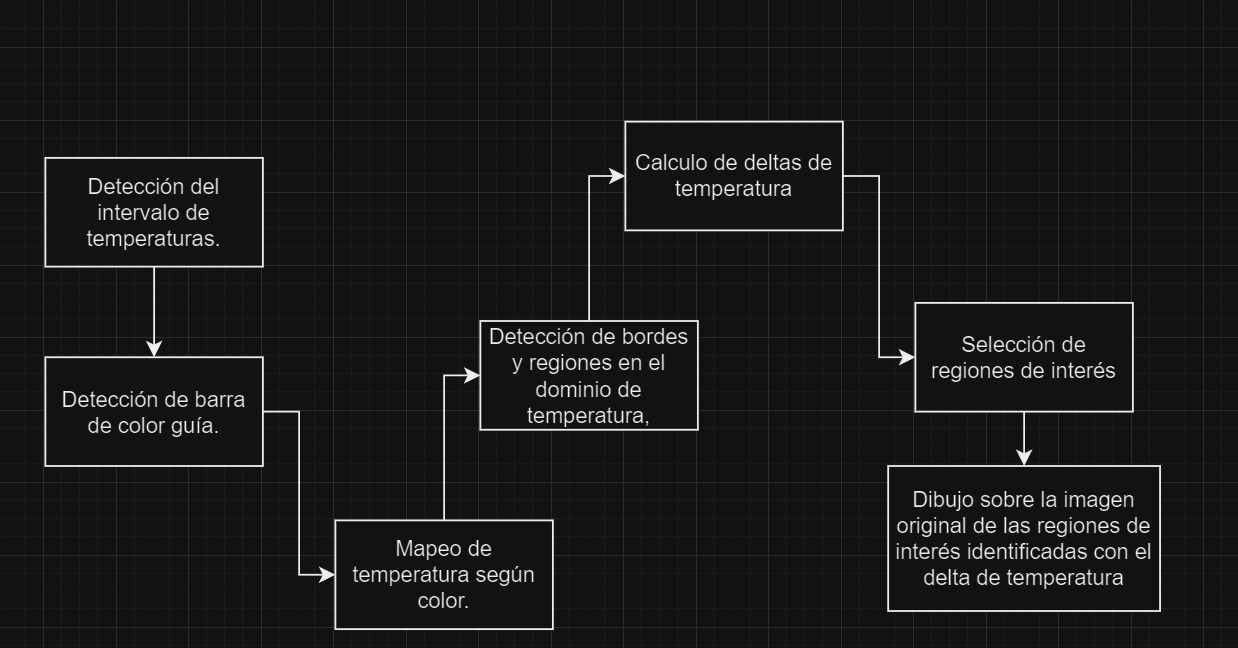

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract

# Set the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\pc\AppData\Local\Tesseract-OCR\tesseract.exe'


# Cargar la imagen original y convertirla a escala de grises
image = cv2.imread('1.JPEG')
gray = cv2.imread('1.JPEG', 0)



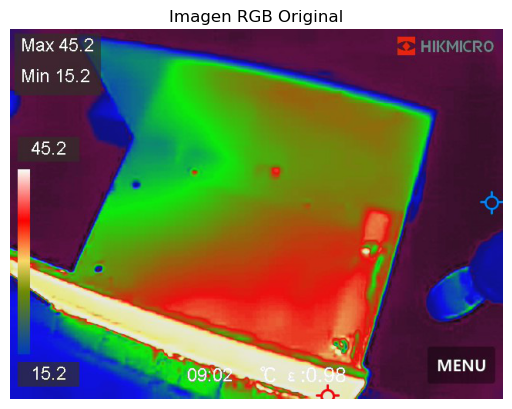

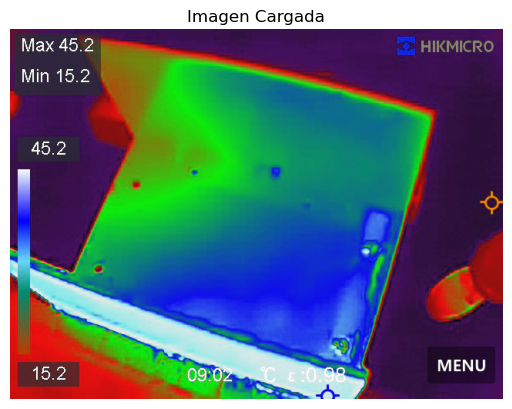

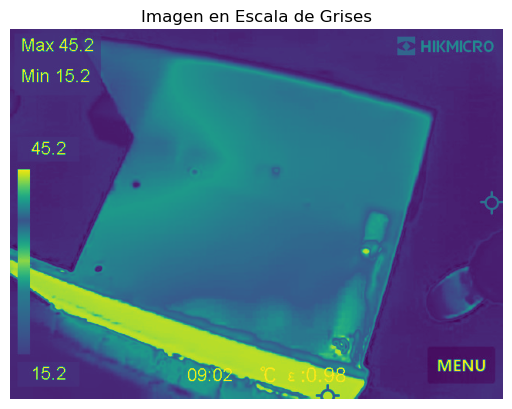

In [10]:
# Convertir la imagen original a formato RGB para mostrar colores adecuadamente
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen RGB original
plt.imshow(image_rgb)
plt.title('Imagen RGB Original')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar la imagen en su forma cargada
plt.imshow(image)
plt.title('Imagen Cargada')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar la imagen en escala de grises
plt.show()
plt.imshow(gray)
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar los ejes
plt.show()



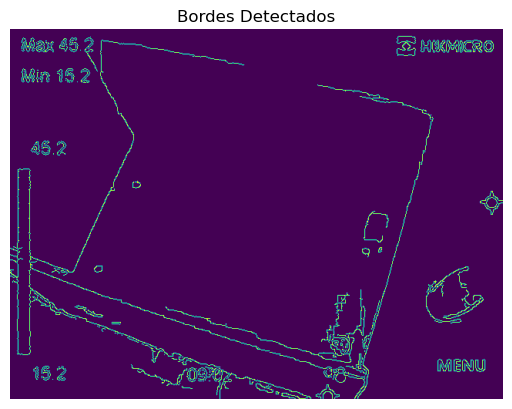

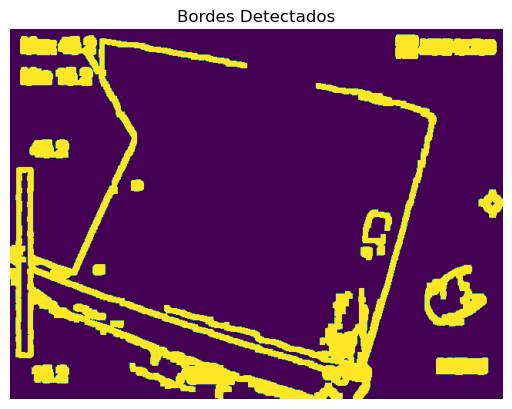

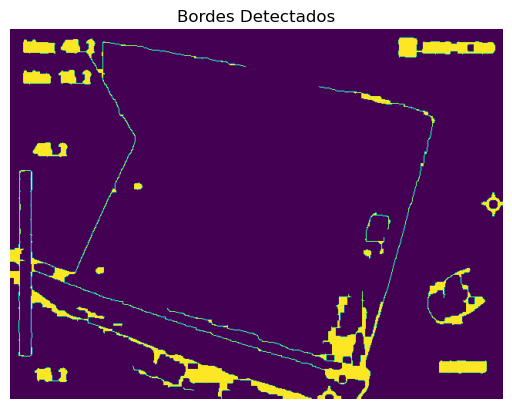

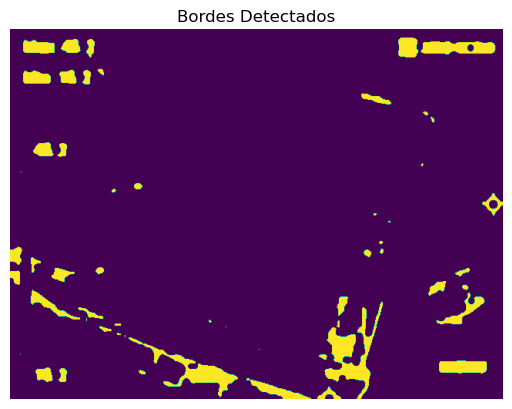

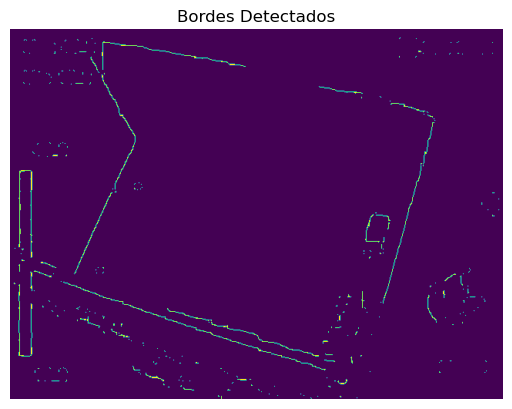

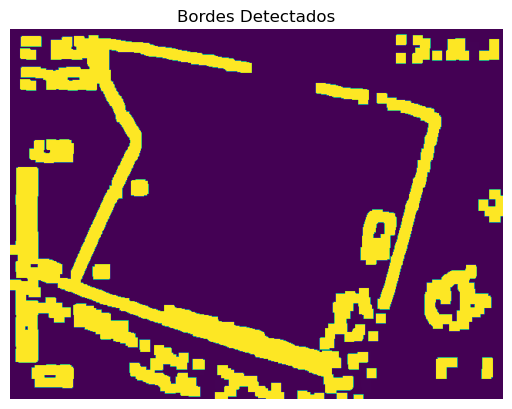

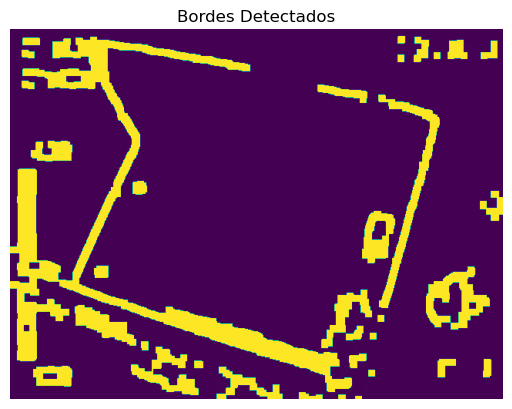

In [11]:
# Detectar bordes en la imagen en escala de grises
edged = cv2.Canny(gray, 30, 200)

# Definir el kernel para la operación de cierre
kernel = np.ones((4, 4), np.uint8)
kernel3 = np.ones((3, 3), np.uint8)

# Aplicar la convolución
#resultado = cv2.filter2D(edged, -1, kernel)



# Operaciones de dilatación y erosión

dilated = cv2.dilate(edged, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=2)

# Filtro de mediana
median_filtered = cv2.medianBlur(eroded, 5)
prueba= eroded - median_filtered
# Definir el kernel para la operación de cierre
kernel2 = np.ones((15, 15), np.uint8)

# Aplicar la operación de cierre
closed_contour = cv2.morphologyEx(prueba, cv2.MORPH_CLOSE, kernel2)

dilated2 = cv2.dilate(closed_contour, kernel, iterations=4)
eroded2 = cv2.erode(dilated2, kernel3, iterations=2)





# Mostrar los bordes detectados
plt.show()
plt.show()
plt.imshow(edged)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar los bordes detectados
plt.show()
plt.show()
plt.imshow(dilated)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar los bordes detectados


plt.show()
plt.show()
plt.imshow(eroded)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()
# Mostrar los bordes detectados


plt.show()
plt.show()
plt.imshow(median_filtered)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()


plt.show()
plt.show()
plt.imshow(prueba)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()


plt.show()
plt.show()
plt.imshow(dilated2)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()

plt.show()
plt.show()
plt.imshow(eroded2)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()




In [12]:
# Encontrar los contornos en los bordes detectados
contours, _ = cv2.findContours(eroded2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
    

(array([[[271, 438]],

       [[271, 446]],

       [[272, 446]],

       [[273, 447]],

       [[273, 448]],

       [[274, 449]],

       [[275, 449]],

       [[276, 450]],

       [[276, 456]],

       [[275, 457]],

       [[268, 457]],

       [[268, 465]],

       [[269, 466]],

       [[269, 472]],

       [[268, 473]],

       [[268, 479]],

       [[280, 479]],

       [[280, 477]],

       [[283, 474]],

       [[291, 474]],

       [[291, 466]],

       [[292, 465]],

       [[294, 465]],

       [[295, 464]],

       [[295, 463]],

       [[297, 461]],

       [[309, 461]],

       [[310, 462]],

       [[310, 463]],

       [[311, 464]],

       [[311, 468]],

       [[316, 468]],

       [[317, 469]],

       [[319, 469]],

       [[320, 470]],

       [[320, 473]],

       [[321, 474]],

       [[323, 474]],

       [[324, 475]],

       [[324, 476]],

       [[333, 476]],

       [[334, 477]],

       [[334, 479]],

       [[359, 479]],

       [[359, 474]],

       [[

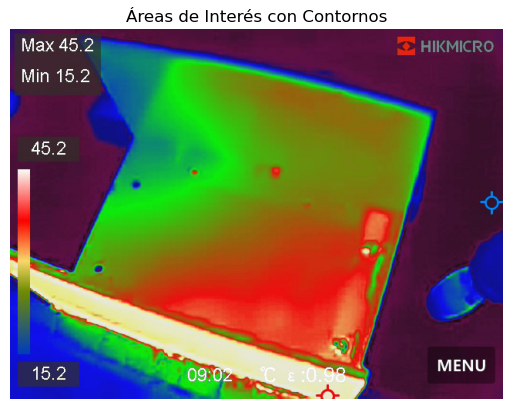

In [13]:
for contour in contours:
    # Filtrar contornos por área (ajustar el valor si es necesario)
    if cv2.contourArea(contour) > 8000 and cv2.contourArea(contour) < 10000 :
        # Obtener las coordenadas del rectángulo del contorno
        x, y, w, h = cv2.boundingRect(contour)

        # Dibujar un rectángulo alrededor del área de interés en color rojo
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Rojo: BGR (0, 0, 255)

        # Imprimir las coordenadas de los 4 puntos del rectángulo, la altura, el ancho y el área
        print("Coordenadas del rectángulo:", (x, y), (x + w, y + h))
        print("Altura:", h)
        print("Ancho:", w)
        print("Área:", cv2.contourArea(contour))

        x_ref = x
        y_ref = y
        x2_ref = x + w
        y2_ref = y + h

# Mostrar la imagen con los contornos resaltados en color blanco
plt.show()
plt.show()
plt.imshow(image_rgb)
plt.title('Áreas de Interés con Contornos')
plt.axis('off')  # Ocultar los ejes
plt.show()

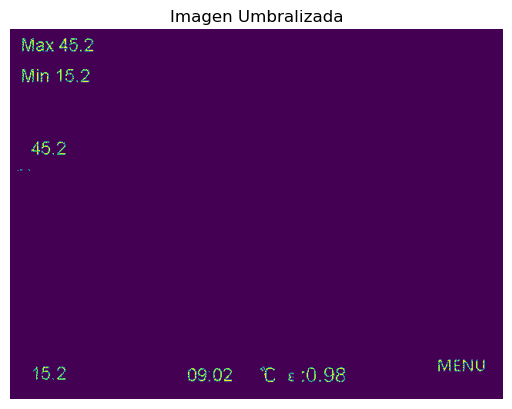

In [14]:
# Aplicar umbralización a la imagen en escala de grises
ret, thresh1 = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

# Mostrar la imagen umbralizada
plt.show()
plt.imshow(thresh1)
plt.title('Imagen Umbralizada')
plt.axis('off')  # Ocultar los ejes
plt.show()



In [ ]:
# Imprimir la matriz de umbralización
print(thresh1)

# Crear un kernel para operaciones morfológicas
kernel = np.ones((20, 20), np.uint8)

# Realizar una operación de cierre morfológico en la imagen umbralizada
joined = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

# Encontrar contornos en la imagen después del cierre morfológico
contours, _ = cv2.findContours(joined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mostrar la imagen después del cierre morfológico
plt.show()
plt.imshow(joined)
plt.title('Imagen después del Cierre Morfológico')
plt.axis('off')  # Ocultar los ejes
plt.show()



In [ ]:
# Crear una copia de la imagen umbralizada
out = thresh1.copy()

# Lista para almacenar las coordenadas de los rectángulos
rectangles_coordinates = []
rectangles_coordinates.append(((x, y), (x + w, y + h)))

# Iterar a través de los contornos después del cierre morfológico
for contour in contours:
    # Filtrar contornos por área (ajustar el valor si es necesario)
    if cv2.contourArea(contour) > 100:
        x, y, w, h = cv2.boundingRect(contour)
        
        rectangles_coordinates.append(((x, y), (x + w, y + h)))
        
        # Dibujar un rectángulo alrededor del área de interés en la imagen RGB original
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Dibujar un rectángulo en la copia de la imagen umbralizada
        cv2.rectangle(out, (x, y), (x + w, y + h), (255, 0, 0), 2)
        

# Mostrar la copia de la imagen umbralizada con los contornos
plt.show()
plt.imshow(out)
plt.title('Copia de la Imagen Umbralizada con Contornos')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar la imagen RGB original con los contornos
plt.show()
plt.imshow(image_rgb)
plt.title('Imagen RGB Original con Contornos')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Imprimir las coordenadas de los rectángulos
print("Coordenadas de los Rectángulos:")
for i, coord in enumerate(rectangles_coordinates, start=1):
    print(f"Rectángulo {i}: {coord}")

In [ ]:
# Variables para los rectángulos más cercanos en las esquinas superior derecha e izquierda
top_right_rectangle = None
bottom_right_rectangle = None
min_distance_top_right = float('inf')
min_distance_bottom_right = float('inf')

# Lista para almacenar las coordenadas de los rectángulos
coordinates_ranges = []

# Iterar a través de los contornos y seleccionar los rectángulos más cercanos
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    center_x = x + w // 2
    center_y = y + h // 2

    # Calcular la distancia desde el centro del rectángulo de referencia
    distance = np.sqrt((center_x - (x_ref + x2_ref / 2)) ** 2 + (center_y - (y_ref + y2_ref / 2)) ** 2)

    # Seleccionar el rectángulo más cercano a la esquina superior derecha
    if center_x > (x2_ref) and center_y < (y2_ref) and distance < min_distance_top_right:
        top_right_rectangle = (x, y, w, h)
        min_distance_top_right = distance

    # Seleccionar el rectángulo más cercano a la esquina inferior derecha
    if center_x > (x2_ref) and center_y > (y2_ref) and distance < min_distance_bottom_right:
        bottom_right_rectangle = (x, y, w, h)
        min_distance_bottom_right = distance

# Agregar las coordenadas de los rectángulos a la lista
if top_right_rectangle is not None:
    coordinates_ranges.append(top_right_rectangle)
if bottom_right_rectangle is not None:
    coordinates_ranges.append(bottom_right_rectangle)

# Crear una copia de la imagen RGB original para dibujar los rectángulos
image_rgb_copy = image_rgb.copy()

# Dibujar el rectángulo de referencia en blanco
cv2.rectangle(image_rgb_copy, (x_ref, y_ref), (x2_ref, y2_ref), (255, 255, 255), 2)  # Blanco: BGR (255, 255, 255)

# Dibujar los rectángulos más cercanos en verde
for rect in coordinates_ranges:
    x, y, w, h = rect
    cv2.rectangle(image_rgb_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Verde: BGR (0, 255, 0)

# Mostrar la imagen con los rectángulos resaltados
plt.show()
plt.imshow(image_rgb_copy)
plt.title('Rectángulo de Referencia en Blanco, Rectángulos Más Cercanos en Verde')
plt.axis('off')  # Ocultar los ejes
plt.show()

#print(x_ref,y_ref)
#print(x2_ref,y2_ref)

# Imprimir las coordenadas de los rectángulos
print("Coordenadas de los rectángulos:", coordinates_ranges)


In [ ]:
image = cv2.imread('1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the coordinates of the green rectangles (top and bottom)
top_rectangle = coordinates_ranges[0]
bottom_rectangle = coordinates_ranges[1]

# Increase the size of the green rectangles by 20%
green_rectangle_expansion = 0.2  # 20% expansion

top_rectangle_expanded = (
    int(top_rectangle[0] - top_rectangle[2] * green_rectangle_expansion),
    int(top_rectangle[1] - top_rectangle[3] * green_rectangle_expansion),
    int(top_rectangle[2] * (1 + 2 * green_rectangle_expansion)),
    int(top_rectangle[3] * (1 + 2 * green_rectangle_expansion))
)

bottom_rectangle_expanded = (
    int(bottom_rectangle[0] - bottom_rectangle[2] * green_rectangle_expansion),
    int(bottom_rectangle[1] - bottom_rectangle[3] * green_rectangle_expansion),
    int(bottom_rectangle[2] * (1 + 2 * green_rectangle_expansion)),
    int(bottom_rectangle[3] * (1 + 2 * green_rectangle_expansion))
)

# Extract temperature values from the expanded green rectangles
top_roi_expanded = image_rgb[top_rectangle_expanded[1]:top_rectangle_expanded[1] + top_rectangle_expanded[3],
                             top_rectangle_expanded[0]:top_rectangle_expanded[0] + top_rectangle_expanded[2]]

bottom_roi_expanded = image_rgb[bottom_rectangle_expanded[1]:bottom_rectangle_expanded[1] + bottom_rectangle_expanded[3],
                                bottom_rectangle_expanded[0]:bottom_rectangle_expanded[0] + bottom_rectangle_expanded[2]]

custom_config = r'--oem 3 --psm 6'
top_temperature_expanded = pytesseract.image_to_string(top_roi_expanded, config=custom_config)
bottom_temperature_expanded = pytesseract.image_to_string(bottom_roi_expanded, config=custom_config)

# Check if the extracted text is a valid numeric value
if top_temperature_expanded.strip().replace('.', '', 1).isdigit():
    top_temperature_expanded = float(top_temperature_expanded)
else:
     # Handle the case where top_temperature is not a valid numeric value
    top_temperature_expanded = None

if bottom_temperature_expanded.strip().replace('.', '', 1).isdigit():
    bottom_temperature_expanded = float(bottom_temperature_expanded)
else:
    # Handle the case where bottom_temperature is not a valid numeric value
    bottom_temperature_expanded = None
    
# Display the results
print("Temperature values:")
if top_temperature_expanded is not None:
    print("Top Rectangle (Expanded):", top_temperature_expanded)
if bottom_temperature_expanded is not None:
    print("Bottom Rectangle (Expanded):", bottom_temperature_expanded)

delta_temperature= top_temperature_expanded - bottom_temperature_expanded

print("Temperature Delta:", delta_temperature,"celcius.")

In [ ]:
img1color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img1color[:,:,0], cmap=plt.cm.gray), plt.title('Plano R (1)', fontsize = 12)
plt.subplot(132),plt.imshow(img1color[:,:,1], cmap=plt.cm.gray), plt.title('Plano G (1)', fontsize = 12)
plt.subplot(133),plt.imshow(img1color[:,:,2], cmap=plt.cm.gray), plt.title('Plano B (1)', fontsize = 12)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen
image = cv2.imread('1.jpg')

# Extrae el canal rojo
red_channel = image[:, :, 2]

# Aplica el umbral binario
threshold_value = 200
_, red_channel_thresholded = cv2.threshold(red_channel, threshold_value, 255, cv2.THRESH_BINARY)

# Crea una nueva imagen umbralizada con solo los valores de rojo mayores a 200
red_image_thresholded = np.zeros_like(image, dtype=np.uint8)
red_image_thresholded[:, :, 2] = red_channel_thresholded

# Muestra la imagen original, el canal rojo y la imagen umbralizada en el canal rojo
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(222), plt.imshow(red_channel, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(223), plt.imshow(cv2.cvtColor(red_image_thresholded, cv2.COLOR_BGR2RGB))
plt.title('Imagen Umbralizada (R > 200)')
plt.axis('off')

plt.subplot(224)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7, rwidth=0.8)
plt.axvline(x=threshold_value, color='black', linestyle='dashed', linewidth=1.5)
plt.title('Histograma - Canal Rojo con Umbral')
plt.xlabel('Intensidad de Píxeles')
plt.ylabel('Frecuencia')

plt.show()


In [ ]:
# Lee la imagen
image = cv2.imread('1.jpg')

# Extrae el canal rojo
red_channel = image[:, :, 2]

# Muestra la imagen con el canal rojo
plt.figure(figsize=(10, 10))
plt.subplot(311), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(312), plt.imshow(red_channel, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

# Muestra el histograma del canal rojo
plt.subplot(313)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7, rwidth=0.8)
plt.title('Histograma - Canal Rojo')
plt.xlabel('Intensidad de Píxeles')
plt.ylabel('Frecuencia')

plt.show()

# Mayor intensidad - mayor presencia de tonos de rojo, mayor intensidad zonas más blancas

In [ ]:
# Lee la imagen
image = cv2.imread('1.jpg')

# Extrae el canal rojo
red_channel = image[:, :, 2]

# Aplica el método de Otsu para encontrar el umbral automáticamente
_, otsu_threshold = cv2.threshold(red_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Crea una nueva imagen umbralizada con el umbral de Otsu
red_image_thresholded_otsu = np.zeros_like(image, dtype=np.uint8)
red_image_thresholded_otsu[:, :, 2] = otsu_threshold

# Muestra la imagen original, el canal rojo y la imagen umbralizada con Otsu en el canal rojo
plt.figure(figsize=(12, 10))

plt.subplot(331), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(332), plt.imshow(red_channel, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(333), plt.imshow(cv2.cvtColor(red_image_thresholded_otsu, cv2.COLOR_BGR2RGB))
plt.title('Imagen Umbralizada (Otsu)')
plt.axis('off')


plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen termográfica
image = cv2.imread('1.jpg')

# Itera sobre los rectángulos y establece a 0 los píxeles dentro de cada uno
for rect in rectangles_coordinates:
    (x, y), (x_end, y_end) = rect
    image[y:y_end, x:x_end, 2] = 0

# Extrae el canal rojo
red_channel = image[:, :, 2]

# Aplica el método de Otsu para encontrar el umbral automáticamente
_, otsu_threshold = cv2.threshold(red_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Crea una nueva imagen umbralizada con el umbral de Otsu
red_image_thresholded_otsu = np.zeros_like(image, dtype=np.uint8)
red_image_thresholded_otsu[:, :, 2] = otsu_threshold

# Muestra la imagen original, el canal rojo y la imagen umbralizada con Otsu en el canal rojo
plt.figure(figsize=(12, 10))

plt.subplot(331), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original con Rectángulos en Negro')
plt.axis('off')

plt.subplot(332), plt.imshow(red_channel, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(333), plt.imshow(cv2.cvtColor(red_image_thresholded_otsu, cv2.COLOR_BGR2RGB))
plt.title('Imagen Umbralizada (Otsu)')
plt.axis('off')

plt.show()



### Fórmula de Interpolación Lineal

La interpolación lineal se puede utilizar para asignar temperaturas a cada valor de píxel en una barra de colores. Aquí está la fórmula:

$ \text{Temperatura} = \text{TemperaturaMinima} + \left(\frac{\text{ValorDelPixel} - \text{ValorMinimo}}{\text{ValorMaximo} - \text{ValorMinimo})}\right) \times (\text{TemperaturaMaxima} - \text{TemperaturaMinima}) $

Donde:
- "Temperatura" es la temperatura asociada al valor del píxel en la barra.
- "Temperatura mínima" es el valor mínimo de temperatura que tiene la termografía.
- "Valor del píxel" es el valor de intensidad del píxel en la escala de grises de la barra.
- "Valor mínimo" es el valor mínimo de intensidad de píxeles en la barra (puede ser 0 si es escala de grises).
- "Rango de valores de píxeles" es la diferencia entre el valor máximo y el valor mínimo de intensidad de píxeles en la barra.
- "Temperatura máxima" es el valor máximo de temperatura que tiene la termografía.

Esta fórmula permite asignar temperaturas a cada píxel en la barra de colores basándote en su intensidad de escala de grises.


In [ ]:
temperaturas_promedio_filtradas=[]
# Calcular el rango de temperaturas
min_temp = bottom_temperature_expanded
max_temp = top_temperature_expanded

# Obtener las coordenadas de la columna vertical
column_x = x_ref  # Suponemos que la columna está en la coordenada x_ref
column_y_start = y_ref
column_y_end = y2_ref
data_dictRGB={}

# Cargar la imagen termográfica
image = cv2.imread('1.jpg')

# Convertir la imagen a espacio de color RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Obtener la columna de un píxel de grosor desde la parte superior hasta la inferior
for y in range(column_y_start, column_y_end + 1):
    # Obtener el valor del componente rojo en el píxel actual
    r_value = image_rgb[y, column_x, 0]  # Componente R en el canal 0 (rojo)
    
    # Calcular la temperatura asociada al píxel en función de su posición vertical
    # Suponemos que el cambio de temperatura es lineal de abajo hacia arriba
    temp = min_temp + (max_temp - min_temp) * (y - column_y_start) / (column_y_end - column_y_start)
    
    # Almacenar los valores en el diccionario
    data_dictRGB[y] = {'R_mask': r_value, 'Temperature': temp}
    temperaturas_promedio_filtradas.append(temp)

# Imprimir el diccionario resultante
print(data_dictRGB)


In [ ]:
# Lee la imagen termográfica
image = cv2.imread('1.jpg')

areas_filtradas = []
perimetros_filtrados = []
centroides_filtrados = []
temperaturas_promedio_filtradas = []
id_filtrados=[]


# Itera sobre los rectángulos y establece a 0 los píxeles dentro de cada uno
for rect in rectangles_coordinates:
    (x, y), (x_end, y_end) = rect
    image[y:y_end, x:x_end, 2] = 0

# Extrae el canal rojo
red_channel = image[:, :, 2]

# Aplica el método de Otsu para encontrar el umbral automáticamente
_, otsu_threshold = cv2.threshold(red_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Encuentra los contornos en la imagen umbralizada
contours, _ = cv2.findContours(otsu_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Obtener la columna de un píxel de grosor desde la parte superior hasta la inferior
for y in range(y_ref, y2_ref + 1):
    # Obtener el valor del componente rojo en el píxel actual
    r_value = image_rgb[y, x_ref, 0]  # Componente R en el canal 0 (rojo)
    
    # Calcular la temperatura asociada al píxel en función de su posición vertical
    # Suponemos que el cambio de temperatura es lineal de abajo hacia arriba
    temp = min_temp + (max_temp - min_temp) * (y - y_ref) / (y2_ref - y_ref)
    
    # Almacenar los valores en el diccionario
    data_dictRGB[y] = {'R_mask': r_value, 'Temperature': temp}

# Itera sobre los contornos y dibuja rectángulos rojos
for i, contour in enumerate(contours, start=1):
    # Calcula el rectángulo delimitador
    x, y, w, h = cv2.boundingRect(contour)

    # Calcula el área
    area = cv2.contourArea(contour)
    

    # Calcula el perímetro
    perimeter = cv2.arcLength(contour, True)
    


    # Calcula el centroide
    M = cv2.moments(contour)
    if M["m00"] != 0:
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])
        centroid = (centroid_x, centroid_y)

        
        
    else:
        centroid = None

    # Descarta las áreas con centroide None y área menor a 100
    if centroid is not None and area >= 100 and centroid_y in data_dictRGB:
        # Dibuja el rectángulo en la imagen original (rojo)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # Muestra información en la consola
        print(f"Región {i} - Área: {area}, Perímetro: {perimeter}, Centroid: {centroid}")
        areas_filtradas.append(area)
        perimetros_filtrados.append(perimeter)
        centroides_filtrados.append(centroid) 
        id_filtrados.append(i)
        

        import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar la imagen con las regiones filtradas
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Iterar sobre las regiones filtradas y dibujar rectángulos con información
for i in range(len(areas_filtradas)):
    area = areas_filtradas[i]
    perimeter = perimetros_filtrados[i]
    centroid = centroides_filtrados[i]

    
    # Dibujar el rectángulo
    rect = patches.Rectangle((centroid[0] - w/2, centroid[1] - h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Mostrar información de área, perímetro y centroide
    plt.text(centroid[0] - w/2, centroid[1] - h/2 - 10, f"Area: {area:.2f}\nPerimeter: {perimeter:.2f}\nCentroid: {centroid}", color='r', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

# Ajustar la escala de los ejes
ax.autoscale()

# Mostrar la imagen
plt.title('Regiones Filtradas (Área >= 100)')
plt.axis('off')
plt.show()



In [ ]:
# Cargar la imagen termográfica
image = cv2.imread('1.jpg')

# Convertir la imagen a espacio de color RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Lista para almacenar las tuplas de ancho y altura
w_rectangles = []
h_rectangles = []

# Crear una imagen en blanco para visualizar las regiones
regions_image = np.zeros_like(image_rgb)

# Obtener la columna de un píxel de grosor desde la parte superior hasta la inferior
for y in range(y_ref, y2_ref + 1):
    # Obtener el valor del componente rojo en el píxel actual
    r_value = image_rgb[y, x_ref, 0]  # Componente R en el canal 0 (rojo)
    
    # Calcular la temperatura asociada al píxel en función de su posición vertical
    # Suponemos que el cambio de temperatura es lineal de abajo hacia arriba
    temp = min_temp + (max_temp - min_temp) * (y - y_ref) / (y2_ref - y_ref)
    
    # Almacenar los valores en el diccionario
    data_dictRGB[y] = {'R_mask': r_value, 'Temperature': temp}

# Iterar sobre las regiones y asignar temperatura promedio
for i, contour in enumerate(contours, start=1):
    # Calcula el rectángulo delimitador
    x, y, w, h = cv2.boundingRect(contour)

    # Calcula el área
    area = cv2.contourArea(contour)

    # Si el área es mayor a 100, realiza el procesamiento
    if area > 100:
        # Calcula el centroide
        M = cv2.moments(contour)
        if M["m00"] != 0:
            centroid_x = int(M["m10"] / M["m00"])
            centroid_y = int(M["m01"] / M["m00"])
            centroid = (centroid_x, centroid_y)
        else:
            centroid = None

        # Asigna temperatura promedio a la región
        if centroid is not None and centroid_y in data_dictRGB:
            # Obtiene la temperatura del diccionario
            temperature = data_dictRGB[centroid_y]['Temperature']
            

            # Asigna la temperatura promedio a la región
            average_temperature = np.mean([temperature for _ in range(int(centroid_y - h / 2), int(centroid_y + h / 2) + 1)])

            # Muestra información en la consola
            print(f"Región {i} - Temperatura promedio: {average_temperature}")
            temperaturas_promedio_filtradas.append(average_temperature)
            # Almacenar las tuplas de ancho y altura en la lista
            w_rectangles.append(w)
            h_rectangles.append(h)


            # Dibuja el rectángulo en la imagen de las regiones
            cv2.rectangle(regions_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            
            

            

# Configuración de la visualización de las regiones filtradas
fig, ax = plt.subplots(figsize=(12, 10))

# Imagen original detrás
plt.imshow(image_rgb)
plt.title('Regiones Filtradas (Área >= 100) con Temperatura')
plt.axis('off')

# Iterar sobre las regiones filtradas y dibujar rectángulos con información
for i in range(len(areas_filtradas)):
    area = areas_filtradas[i]
    perimeter = perimetros_filtrados[i]
    centroid = centroides_filtrados[i]
    temperature = temperaturas_promedio_filtradas[i]

    # Dibujar el rectángulo
    rect = patches.Rectangle((centroid[0] - w/2, centroid[1] - h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Mostrar información de área, perímetro y centroide
    plt.text(centroid[0] - w/2, centroid[1] - h/2 - 10, f"Area: {area:.2f}\nPerimeter: {perimeter:.2f}\nCentroid: {centroid}\nTemperature: {temperature:.2f}", color='r', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

# Ajustar la escala de los ejes
ax.autoscale()

# Mostrar la imagen con rectángulos y la información adicional
plt.show()

# Mostrar ambas imágenes en una sola figura
plt.figure(figsize=(12, 10))

# Imagen de las regiones
plt.subplot(221), plt.imshow(regions_image)
plt.title('Regiones con Temperatura Promedio (Área > 100)')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(222), plt.imshow(cv2.cvtColor(red_image_thresholded_otsu, cv2.COLOR_BGR2RGB))
plt.title('Imagen Umbralizada (Otsu)')
plt.axis('off')

plt.show()


In [ ]:
import pandas as pd
print(areas_filtradas, perimetros_filtrados, centroides_filtrados, temperaturas_promedio_filtradas)
print(len(areas_filtradas))
print(len(perimetros_filtrados))
print(len(centroides_filtrados))
print(len(temperaturas_promedio_filtradas))
print(len(temperaturas_promedio_filtradas))



vector_caracteristicas=[id_filtrados,areas_filtradas,perimetros_filtrados,centroides_filtrados,temperaturas_promedio_filtradas,w_rectangles,h_rectangles]


print(vector_caracteristicas)
# Crea un DataFrame con las listas
df = pd.DataFrame({
    'ID': id_filtrados,
    'Area': areas_filtradas,
    'Perimetro': perimetros_filtrados,
    'Centroide': centroides_filtrados,
    'Temperaturas': temperaturas_promedio_filtradas,
    'w rectangulos': w_rectangles,
    'h rectangulos': h_rectangles
    
})

print(df)

In [ ]:
from sklearn import cluster
X = df.drop('Centroide',axis=1).drop('ID',axis=1)
Sum_of_squared_distances = []
K = range(2,6)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [ ]:
k = 3 #ESCOGER DE LA GRAFICA EL VALOR MAXIMO QUE MUESTRE UN CAMBIO REAL
km = cluster.KMeans(n_clusters=k)
km = km.fit(X)
y = km.predict(X)

In [ ]:
df['Cluster'] = y
ejemplos_cluster = df.groupby('Cluster').first().reset_index()
ejemplos_cluster
